<a href="https://colab.research.google.com/github/ArhanWR/Pengolahan-Citra-dan-Visi-Komputer/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum
**Kelompok 9**

**Nama Anggota :**

1. Abdullah Khafabi / 2041720050

7. Alfan Farchi Al-Hadi / 2141720084

**10. Arhan Windu Rizki Putra Budianto / 2141720227**

In [7]:
# import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# akses drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

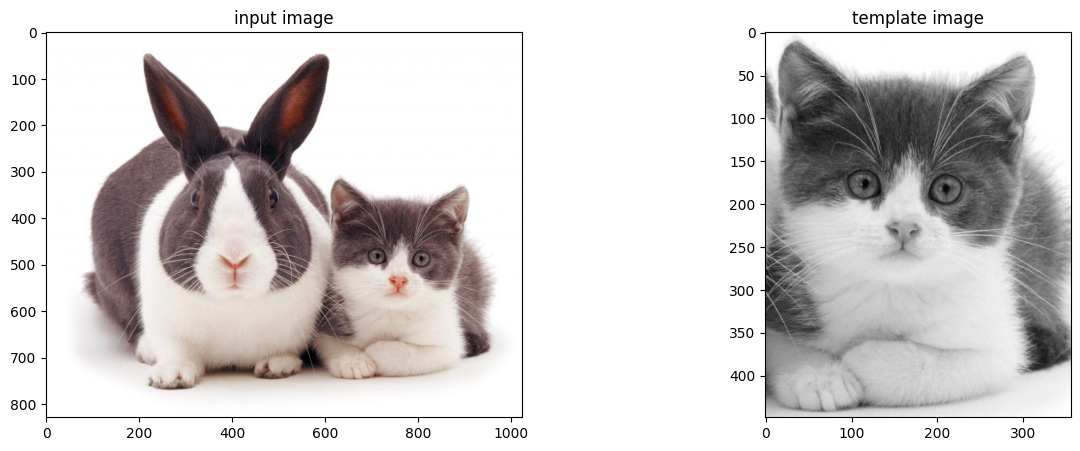

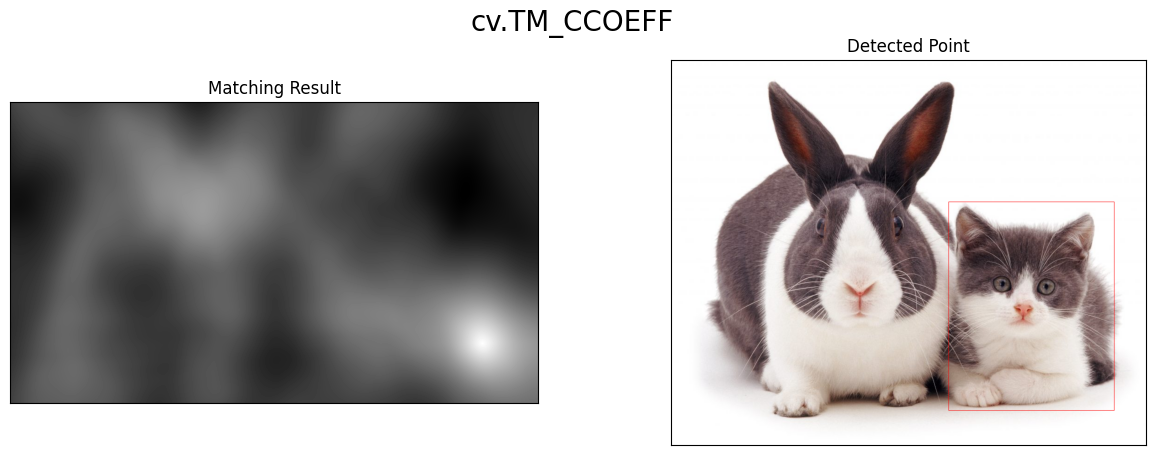

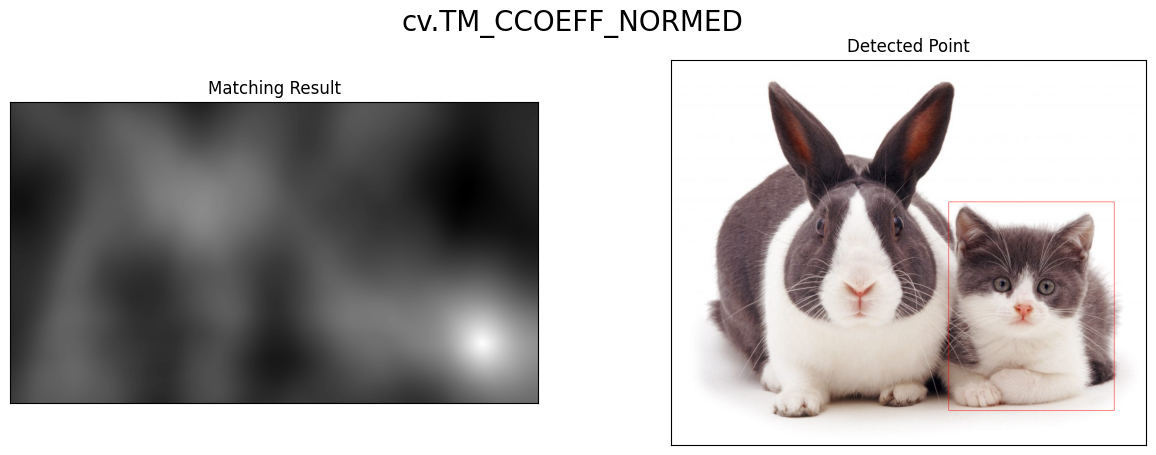

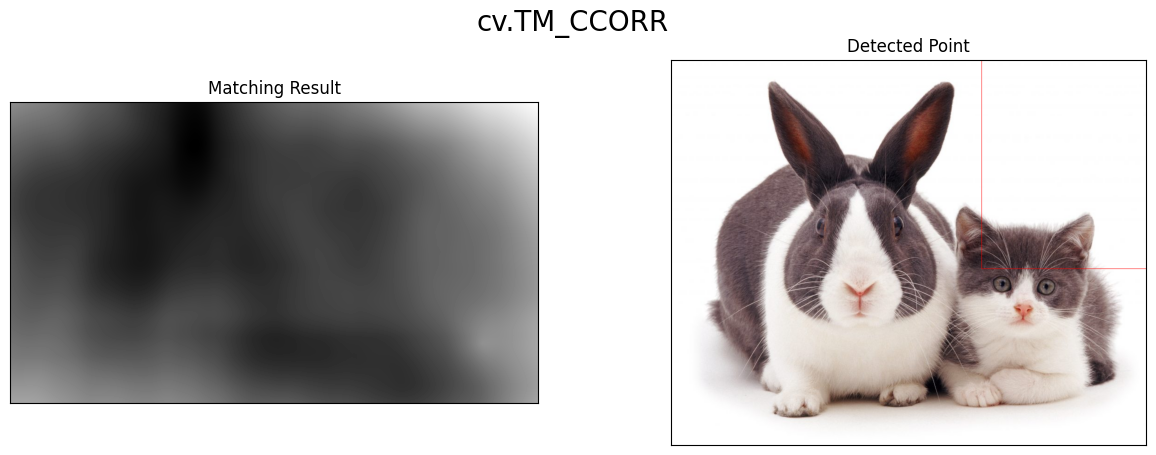

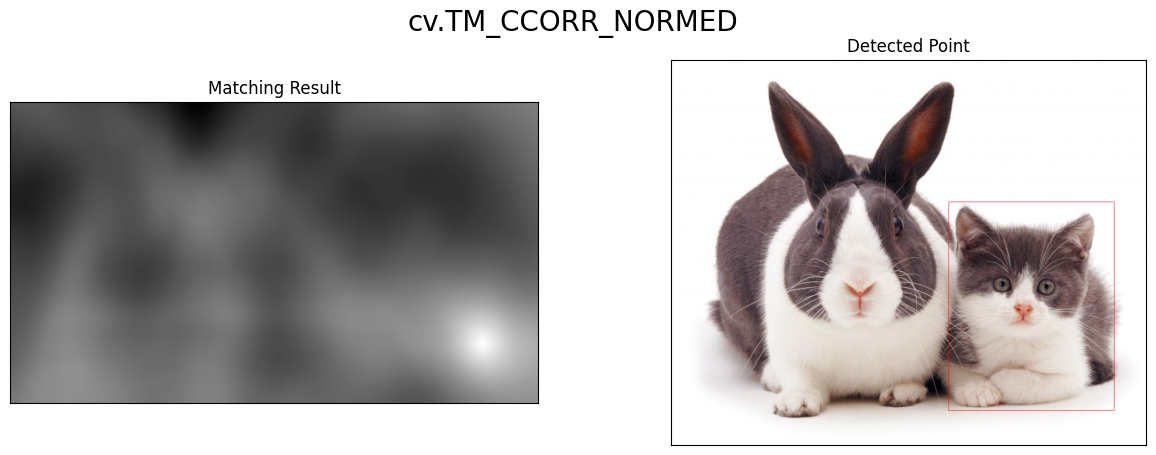

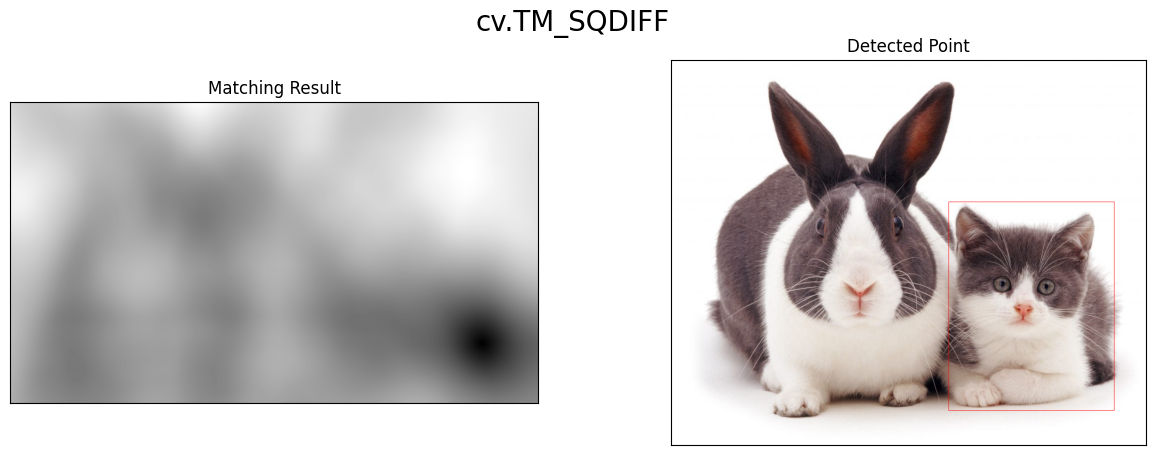

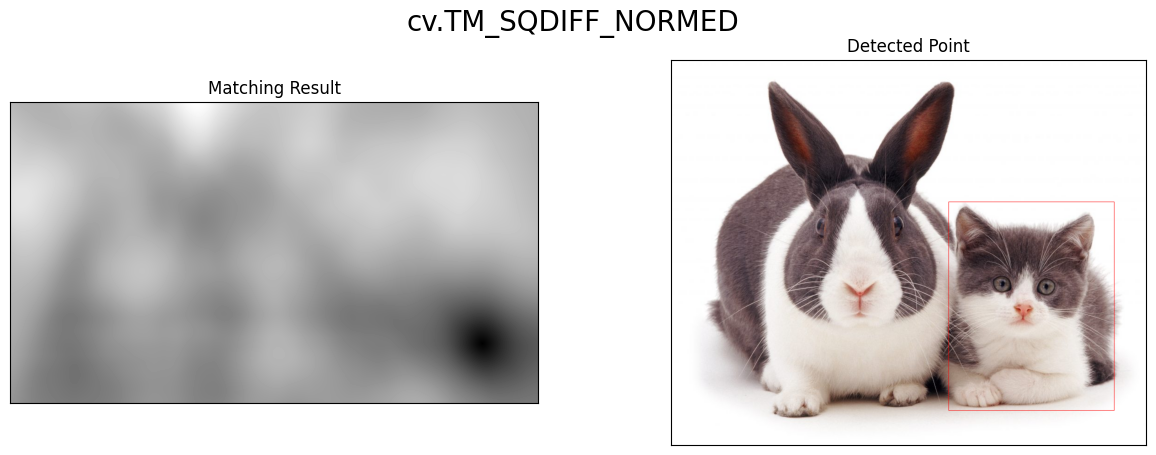

In [8]:
# Membaca gambar input
img = cv.imread('/content/drive/MyDrive/PCVK/object_detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/object_detection/cat2_template.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:

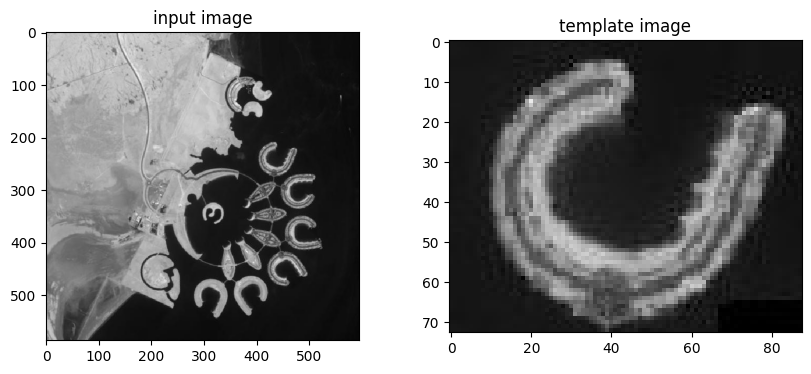

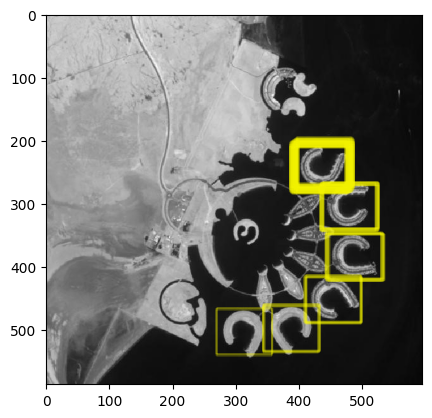

In [14]:
# Load the input image and template
main_image = cv2.imread('/content/drive/MyDrive/PCVK/object_detection/bahrain.jpg', 0)
template = cv2.imread('/content/drive/MyDrive/PCVK/object_detection/bahrain-template.jpg', 0)

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(10,4)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# library untuk mencocokkan beberapa gambar yang sama
from skimage.feature import match_template

# Hitung kemiripan citra dengan citra template
result = match_template(main_image, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45 # menentukan threshold untuk menentukan hasil matc
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(main_image, cmap=plt.cm.gray)
# ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]): # iterasi pada setiap lokasi yang ditemukan
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rect)

plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:
- Sobel Edge Detection
- Canny Edge Detection
- Laplacian Edge Detection

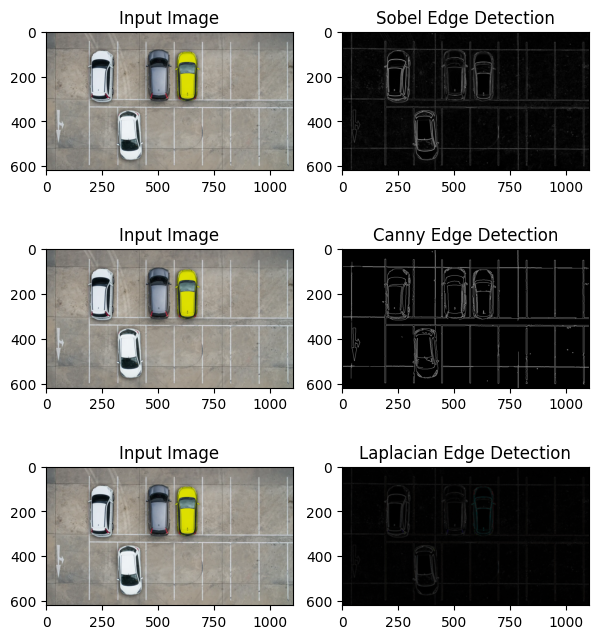

In [19]:
# Baca gambar
image = cv.imread('/content/drive/MyDrive/PCVK/object_detection/car-park.jpg')

# Apply Gaussian blur (reduce noise)
img_gs = cv2.GaussianBlur(image, (3, 3), 0)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Apply Canny edge detection
canny = cv2.Canny(img_gs, 100, 200)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(img_gs, cv2.CV_64F) # Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
laplacian_abs = cv2.convertScaleAbs(laplacian)  # Converting back to uint8

# Menampilkan hasil
plt.figure(figsize=(7, 8))

plt.subplot(321)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('on')
plt.subplot(322)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('on')

plt.subplot(323)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('on')
plt.subplot(324)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('on')

plt.subplot(325)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('on')
plt.subplot(326)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('on')

plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:
- Harris Corner Detection
- Shi-Tomasi Detection

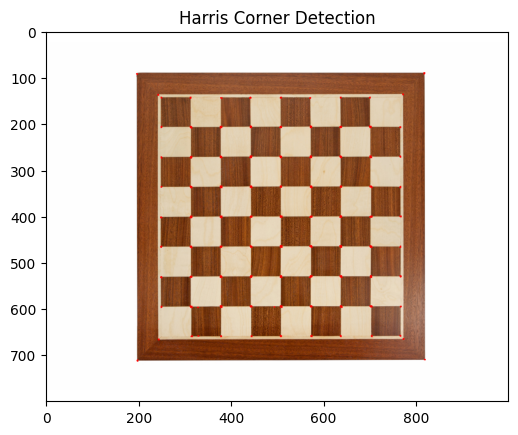

In [20]:
# Load the input image
img = cv2.imread('/content/drive/MyDrive/PCVK/object_detection/chess-board.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Harris Corner Detection
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate the result for marking the corners
dst = cv2.dilate(dst, None)

# Threshold for an optimal value
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Display the input image with the detected corners
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.show()

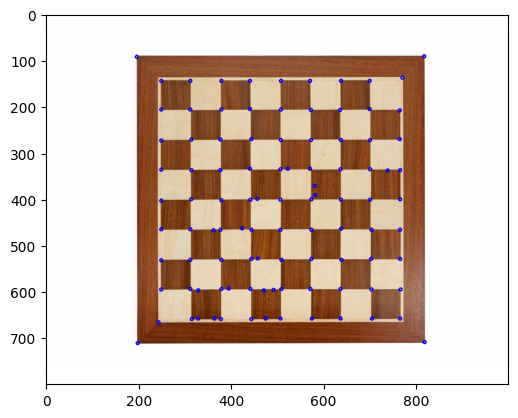

In [21]:
# Load the input image
img = cv2.imread('/content/drive/MyDrive/PCVK/object_detection/chess-board.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)

# Draw circles around the corners
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, 255, 2)

# Display the input image with the detected corners
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


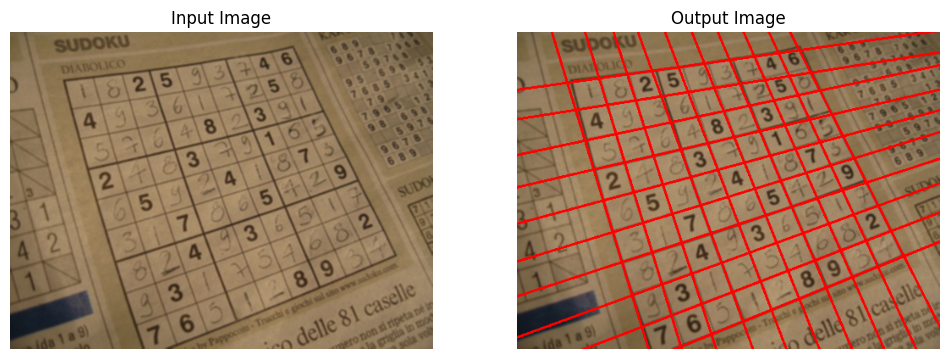

In [13]:
# Baca gambar
ori = cv.imread('/content/drive/MyDrive/PCVK/object_detection/sudoku.jpg')
input_img = cv.imread('/content/drive/MyDrive/PCVK/object_detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

# Menampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv.cvtColor(ori, cv.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
plt.title('Output Image')
plt.axis('off')

plt.show()

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

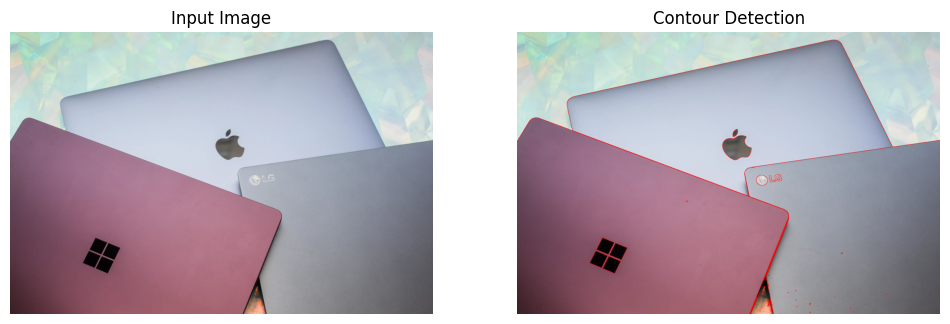

In [16]:
# Baca gambar
image = cv.imread('/content/drive/MyDrive/PCVK/object_detection/laptop.jpg')

# Ubah ke citra grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Lakukan deteksi tepi (edge detection) dengan Canny
edges = cv.Canny(gray, 50, 150, apertureSize=3)

# Temukan kontur pada gambar
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
result_image = image.copy()
cv.drawContours(result_image, contours, -1, (0, 0, 255), 2)

# Menampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.title('Contour Detection')
plt.axis('off')

plt.show()

# Pengayaan Materi KTP

2. Muat 2 library berikut sebagai tahapan persiapan

In [22]:
import cv2
import os

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori
dataset tersebut

In [23]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/KTP_More"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
 src = cv2.imread(os.path.join(path_plate, name_file))
 blurred = src.copy()
 gray = blurred.copy()

4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle
dapat direduksi


In [24]:
# Filtering
for i in range(10):
 blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan
binerisasi citra (thresholding)


160.0 (636, 996)


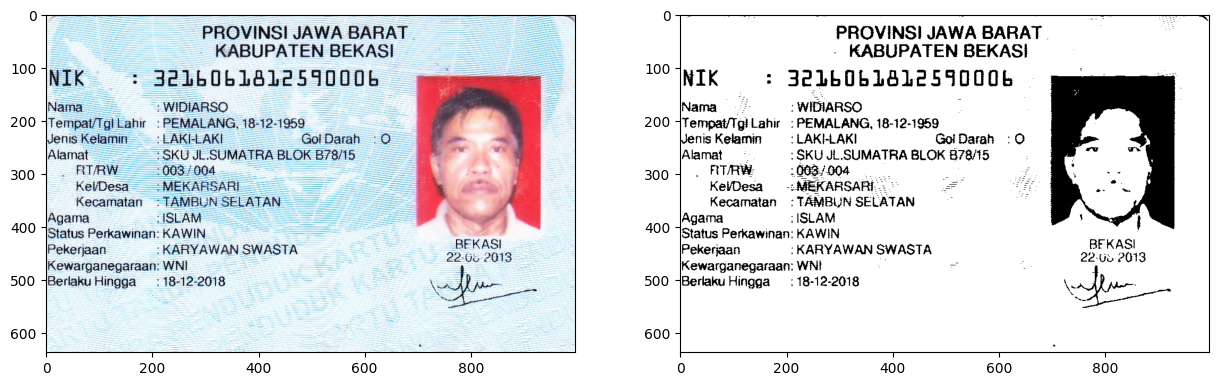

In [25]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[1].imshow(bw, cmap='gray')
plt.show()

6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter
atau obyek tidak berhimpitan.

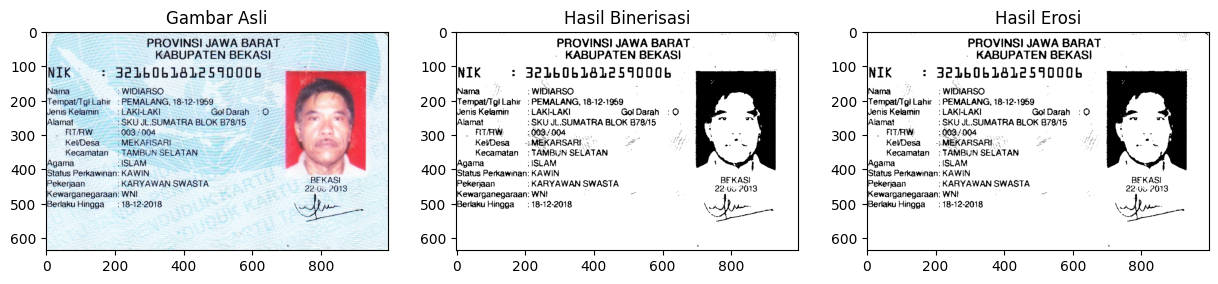

In [26]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Hasil Binerisasi")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Hasil Erosi")
plt.show()

7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek.
Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di
dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu
penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran
dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain
terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik
(karena hasil akuisisi setiap citra dapat berbeda).

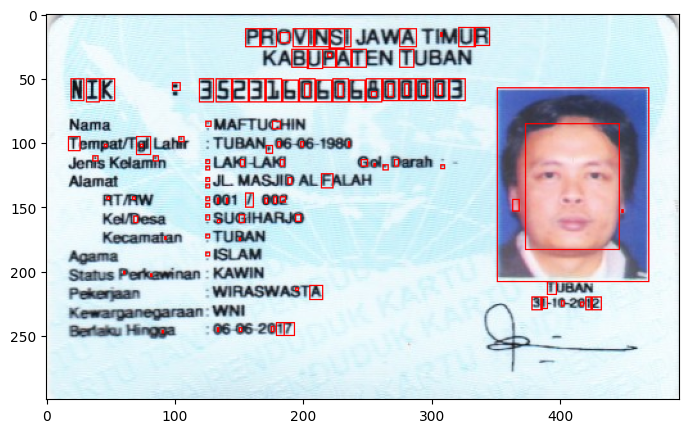

In [27]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp4.png')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))

# Tugas Praktikum
Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP
untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing
yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan
secara berkelompok dengan aturan sebagai berikut:
1. Kelompok 1 - KTP Riyanto Sleman
2. Kelompok 2 - KTP Galang Raka Bengkulu
3. Kelompok 3 - KTP Arief Wijaya Cimahi
4. Kelompok 4 - KTP Edo Nias
5. Kelompok 5 - KTP Widiarso Bekasi
6. Kelompok 6 - KTP Abdurrauf Soppeng

**Karena kelompok saya kelompok 9 saya ambil kelompok 3 karena kelompok 1 bisa kelompok 7 dan kelompok 2 bisa kelompok 8**

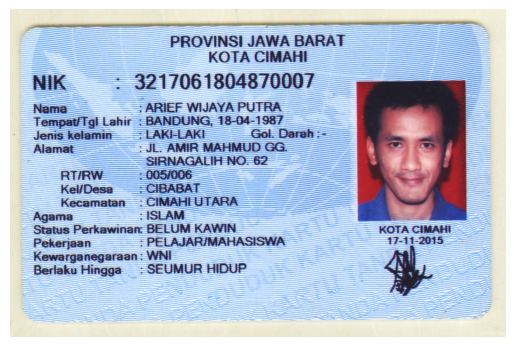

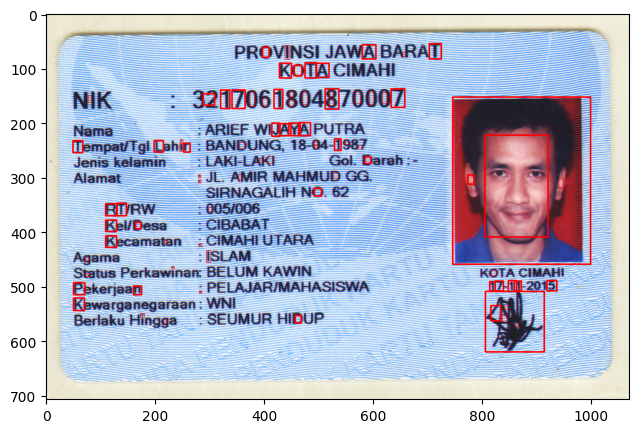

In [47]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp2.png')
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB)), plt.axis('off')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 5 and w >= 5 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))